Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Runtime$\rightarrow$Restart runtime) and then **run all cells** (in the menubar, select Runtime$\rightarrow$Run all).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and ID below:

In [7]:
NAME = "Baran Berkay Hökelek"
KUID = "0060673"

---

<h2 style="text-align: center; line-height: 0px;">CHBI 422 / 522</h2>
<h3 style="text-align: center; line-height: 0px;">Spring 2022</h3>
<h3 style="text-align: center; line-height: 0px;">Homework 2</h3>
<h4 style="text-align: center; line-height: 0px;">Due date: March 23, 2022 - 23:59</h4>

<hr>

In this homework you are going to work with a pre-modified PDB file. You will be required to do calculate some angles, distances, and apply some transformations. This notebook will guide you through the steps of the homework. Check the provided test cases to make sure that you have the same requirement format.

To complete these homeworks, you will use Google Colab.If you experience any problems please get in touch with the TA: zabali16@ku.edu.tr

**Submission** <br>
After you are done and passed all the test, please submit this notebook to Blackboard. If you are not getting full points from a test, you may be failing some hidden tests. Think about the edge cases (your code might be working in general, but failing for some special cases). Please do not forget to **save** your work before you submit, and **check** whether you are in the final version.

**Importing Libraries** <br>
Please run the below cell to import the necessary libraries. Do not import any libraries other then the ones provided. If a library, or function you want to use is not included in the following cell, then you are not allowed to use it for this homework.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

### Part 1 - Reading a PDB File as a NumPy Array (10 points)

Run the below cell to download the PDB file for this assignment.

In [9]:
!wget -O hw2.pdb https://raw.githubusercontent.com/zeynepabali/ku_chbi522/main/hw2.pdb

--2022-03-22 16:09:39--  https://raw.githubusercontent.com/zeynepabali/ku_chbi522/main/hw2.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2430 (2.4K) [text/plain]
Saving to: ‘hw2.pdb’

hw2.pdb             100%[===================>]   2.37K  --.-KB/s    in 0s      

2022-03-22 16:09:39 (31.5 MB/s) - ‘hw2.pdb’ saved [2430/2430]



A few sample lines from the downloaded file looks like below: <br>
ATOM&emsp;1&emsp;N&ensp;&emsp;THR&emsp;1&emsp;-7.712&emsp;14.556&emsp;16.794&emsp;1.00&emsp;17.45&emsp;N <br>
ATOM&emsp;2&emsp;CA&emsp;THR&emsp;1&emsp;-7.046&emsp;15.510&emsp;17.660&emsp;1.00&emsp;16.13&emsp;C <br>
ATOM&emsp;3&emsp;C&ensp;&emsp;THR&emsp;1&emsp;-6.849&emsp;14.891&emsp;19.045&emsp;1.00&emsp;14.58&emsp;C <br>
ATOM&emsp;8&emsp;N&ensp;&emsp;VAL&emsp;2&emsp;-5.693&emsp;15.098&emsp;19.646&emsp;1.00&emsp;12.07&emsp;N <br>
ATOM&emsp;9&emsp;CA&emsp;VAL&emsp;2&emsp;-5.490&emsp;14.585&emsp;21.007&emsp;1.00&emsp;10.98&emsp;C

This file is already cleaned for you. It only contains the backbone atoms (N, CA, C), and no side chain atoms for your convenience.

Each column in this file has a meaning. Normally, PDB files include much more information than the atom position of a molecules atoms. You can check one if you wish to here: https://files.rcsb.org/view/1A09.pdb Let us go over what each column in this file tells us:

**Column 1:** "ATOM" identifier specifies that this line gives information about an atom in the strucure. <br>
**Column 2:** Atom number - They are not continues in our case, since we removed the side chain atoms. <br>
**Column 3:** Atom type <br>
**Column 4:** Residue type <br>
**Column 5:** Residue number <br>
**Column 6:** X coordinate <br>
**Column 7:** Y coordinate <br>
**Column 8:** Z coordinate <br>
**Column 9:** Occupancy <br>
**Column 10:** B factor <br>
**Column 11:** Atom type

Since we are interested in the coordinates of the atoms in this homework, we are going to use columns 3,5-8. Though, remember when you are coding that Python is zero-indexed.

In [12]:
def read_pdb_file(file_path):
  """ Read the coordinates of atoms from a PDB file and return a dictionary of coordinate lists 
      You may want to check np.genfromtxt() and its additional parameters, or you can use any 
      file reading method you feel comfortable
      You will need "Atom type", "Residue Number", "X-Y-Z" coordinates 
      Your final output should look like:
      {"Residue number": {"Atom type": [x-y-z coordinates]}}"""

  """
  **Column 1:** "ATOM" identifier specifies that this line gives information about an atom in the strucure. <br>
  **Column 2:** Atom number - They are not continues in our case, since we removed the side chain atoms. <br>
  **Column 3:** Atom type <br>
  **Column 4:** Residue type <br>
  **Column 5:** Residue number <br>
  **Column 6:** X coordinate <br>
  **Column 7:** Y coordinate <br>
  **Column 8:** Z coordinate <br>
  **Column 9:** Occupancy <br>
  **Column 10:** B factor <br>
  **Column 11:** Atom type
  """
  ATOM_TYPE_INDEX = 2
  RESIDUE_TYPE_INDEX = 3
  RESIDUE_NUMBER_INDEX = 4
  X_COORDINATE_INDEX = 5
  Y_COORDINATE_INDEX = 6
  Z_COORDINATE_INDEX = 7
  

  data = np.genfromtxt('hw2.pdb', dtype=None, encoding=None)
  size = len(data)
  pdb_dict = {}
  for ind_main in range(size):
    if ind_main > 0 and data[ind_main-1][RESIDUE_NUMBER_INDEX] == data[ind_main][RESIDUE_NUMBER_INDEX]:
      continue
    res_num = data[ind_main][RESIDUE_NUMBER_INDEX]
    pdb_dict[res_num] = {}
    ind_side = ind_main
    while ind_side < size and data[ind_side][RESIDUE_NUMBER_INDEX] == data[ind_main][RESIDUE_NUMBER_INDEX]:
      atom = data[ind_side][ATOM_TYPE_INDEX]
      coords = [data[ind_side][X_COORDINATE_INDEX], data[ind_side][Y_COORDINATE_INDEX], data[ind_side][Z_COORDINATE_INDEX]]
      pdb_dict[res_num][atom] = coords
      ind_side += 1


  return pdb_dict

In [13]:
assert len(read_pdb_file('hw2.pdb')) == 10
assert read_pdb_file('hw2.pdb')[4] == {'N': [-6.222, 16.563, 26.096], 'CA': [-5.723, 16.132, 27.38], 'C': [-6.713, 16.614, 28.449]}
assert read_pdb_file('hw2.pdb')[2]['N'] == [-5.693, 15.098, 19.646]
assert read_pdb_file('hw2.pdb')[10]['CA'] == [-11.739, 13.008, 46.64]

### Part 2 - Calculating the angles and transformation matrices by hand (25 Points)

You can either type your solution using $\LaTeX$ in the next cell, or you can upload a scanned copy of your hand-written solution to Blackboard (Please make sure that your hand-written solution is readable). You will get the full point for a correct solution in either case!

Using $\LaTeX$ may appear a bit complicated at first. But, we would suggest giving it a *few* chances. Here are some resources to help you with getting started:
https://jupyterbook.org/content/math.html <br>
https://www.overleaf.com/learn/latex/Mathematical_expressions

Try to copy-paste a few equations from the first link to see how it works. Then you can work your way towards your own solution by changing bits and pieces.

Calculate the bond vectors, phi (𝜙), psi (𝜓), omega (𝜔), theta (𝜃) angles 

1.   List item
2.   List item

for **residue number 4 (TYR)**.

In [14]:
print(read_pdb_file('hw2.pdb')[3])
print(read_pdb_file('hw2.pdb')[4])
print(read_pdb_file('hw2.pdb')[5])

{'N': [-6.867, 15.389, 22.802], 'CA': [-7.253, 16.247, 23.919], 'C': [-6.661, 15.678, 25.19]}
{'N': [-6.222, 16.563, 26.096], 'CA': [-5.723, 16.132, 27.38], 'C': [-6.713, 16.614, 28.449]}
{'N': [-7.246, 15.673, 29.198], 'CA': [-8.238, 15.938, 30.232], 'C': [-7.695, 15.622, 31.609]}


The $\phi_4$ angle is calculated between the two half-planes defined by: $\left(C_{3}, N_4, C_{\alpha_4}\right)$ and $\left(N_4, C_{\alpha_4}, C_4\right)$.

For the first plane, let's calculate the 2 vectors:

$\textbf{u}_1 = N_4 - C_3 = (-6.222, 16.563, 26.096) - (-6.661, 15.678, 25.19) = (0.439, 0.885, 0.906)$ 

$\textbf{u}_2 = C_{\alpha_4} - N_4 = (-5.723, 16.132, 27.38) - (-6.222, 16.563, 26.096) = (0.499, -0.431, 1.284)$

Let's repeat the process for the other half-plane. They will share the vector $\textbf{u}_2$, so there's no need to recalculate that.

$\textbf{u}_3 = C_4 - C_{\alpha_4} = (-6.713, 16.614, 28.449) - (-5.723, 16.132, 27.38) = (-0.99, 0.482, 1.069)$

The dihedral angle formulas are given by:

$\cos(\phi) = \frac{\left( \mathbf{u}_1 \times \mathbf{u}_2 \right) \cdot \left( \mathbf{u}_2 \times \mathbf{u}_3 \right)}{\left| \mathbf{u}_1 \times \mathbf{u}_2 \right| \left| \mathbf{u}_2 \times \mathbf{u}_3 \right|} = \frac{(1.52683, -0.111582, -0.630824) \cdot (-1.07963, -1.80459, -0.186172)}{3.49554} = -0.380373$

$\sin(\phi) = \frac{\mathbf{u}_2 \cdot \left( \left( \mathbf{u}_1 \times \mathbf{u}_2 \right) \times \left( \mathbf{u}_2 \times \mathbf{u}_3 \right) \right)}{\left| \mathbf{u}_2 \right| \left| \mathbf{u}_1 \times \mathbf{u}_2 \right| \left| \mathbf{u}_2 \times \mathbf{u}_3 \right|} = \frac{(0.499, -0.431, 1.284) \cdot \left( (1.52683, -0.111582, -0.630824) \times (-1.07963, -1.80459, -0.186172) \right)}{5.04548} = -0.924832$

So, the angle $\phi_4$ is $-1.961rad = -112.36°$.


##############################################################################

The $\psi_4$ angle is calculated between the two half-planes defined by: $\left(N_4, C_{\alpha_4}, C_4\right)$ and $\left(C_{\alpha_4}, C_4, N_5\right)$.

For the first plane, the calculations are done above (They are $\textbf{u}_2$ and $\textbf{u}_3$):

$\textbf{u}_2 = (0.499, -0.431, 1.284)$ 

$\textbf{u}_3 = (-0.99, 0.482, 1.069)$

Let's repeat the process for the other half-plane. They will share the vector $\textbf{u}_3$, so there's no need to recalculate that.

$\textbf{u}_4 = N_5 - C_4 = (-7.246, 15.673, 29.198) - (-6.713, 16.614, 28.449) = (-0.533, -0.941, 0.749)$

The dihedral angle formulas are given by:

$\cos(\psi) = \frac{\left( \mathbf{u}_2 \times \mathbf{u}_3 \right) \cdot \left( \mathbf{u}_3 \times \mathbf{u}_4 \right)}{\left| \mathbf{u}_2 \times \mathbf{u}_3 \right| \left| \mathbf{u}_3 \times \mathbf{u}_4 \right|} = \frac{(-1.07963, -1.80459, -0.186172) \cdot (1.36695, 0.171733, 1.1885)}{3.84117} = -0.52249$

$\sin(\psi) = \frac{\mathbf{u}_3 \cdot \left( \left( \mathbf{u}_2 \times \mathbf{u}_3 \right) \times \left( \mathbf{u}_3 \times \mathbf{u}_4 \right) \right)}{\left| \mathbf{u}_3 \right| \left| \mathbf{u}_2 \times \mathbf{u}_3 \right| \left| \mathbf{u}_3 \times \mathbf{u}_4 \right|} = \frac{(-0.99, 0.482, 1.069) \cdot \left( (-1.07963, -1.80459, -0.186172) \times (1.36695, 0.171733, 1.1885) \right)}{5.8949} = 0.852645$

So, the angle $\psi_4$ is $2.12056rad = 121.5°$.


##############################################################################

The $\omega_4$ angle is calculated between the two half-planes defined by: $\left(C_{\alpha_4}, C_4, N_5\right)$ and $\left( C_4, N_5, C_{\alpha_5}\right)$.

For the first plane, the calculations are done above (They are $\textbf{u}_3$ and $\textbf{u}_4$):

$\textbf{u}_3 = (-0.99, 0.482, 1.069)$ 

$\textbf{u}_4 = (-0.533, -0.941, 0.749)$

Let's repeat the process for the other half-plane. They will share the vector $\textbf{u}_4$, so there's no need to recalculate that.

$\textbf{u}_5 = C_{\alpha_5} - N_5 = (-8.238, 15.938, 30.232) - (-7.246, 15.673, 29.198) = (-0.992, 0.265, 1.034)$

The dihedral angle formulas are given by:

$\cos(\omega) = \frac{\left( \mathbf{u}_3 \times \mathbf{u}_4 \right) \cdot \left( \mathbf{u}_4 \times \mathbf{u}_5 \right)}{\left| \mathbf{u}_3 \times \mathbf{u}_4 \right| \left| \mathbf{u}_4 \times \mathbf{u}_5 \right|} = -0.999321$

$\sin(\omega) = \frac{\mathbf{u}_4 \cdot \left( \left( \mathbf{u}_3 \times \mathbf{u}_4 \right) \times \left( \mathbf{u}_4 \times \mathbf{u}_5 \right) \right)}{\left| \mathbf{u}_4 \right| \left| \mathbf{u}_3 \times \mathbf{u}_4 \right| \left| \mathbf{u}_4 \times \mathbf{u}_5 \right|} = -0.0368420$

So, the angle $\omega_4$ is $-3.10474rad = -177.888°$.


##############################################################################


$\theta_4$ is the angle between the successive $C_{\alpha}$ atoms $\widehat{C_{\alpha_3} C_{\alpha_4} C_{\alpha_5}}$. We need to calculate 2 vectors:

1. $\textbf{u}_1$, the vector connecting $C_{\alpha_3}$ and $C_{\alpha_4}$.
2. $\textbf{u}_2$, the vector connecting $C_{\alpha_4}$ and $C_{\alpha_5}$.

Then we can use the law of cosines to find the angle $\theta$:

$(\textbf{u}_1 - \textbf{u}_2) \cdot (\textbf{u}_1 - \textbf{u}_2) = \textbf{u}_1^{2} + \textbf{u}_2^{2} - 2\|\textbf{u}_1\| \|\textbf{u}_2\| \cos\theta$

$\textbf{u}_1 = \overrightarrow{C_{\alpha_3}} - \overrightarrow{C_{\alpha_4}} = (-7.253, 16.247, 23.919) - (-5.723, 16.132, 27.38)  = (-1.53, 0.115, -3.461)$

$\textbf{u}_2 = \overrightarrow{C_{\alpha_5}} - \overrightarrow{C_{\alpha_4}} = (-8.238, 15.938, 30.232) - (-5.723, 16.132, 27.38) = (-2.515, -0.194, 2.852)$

So, $\theta_4$ is $2.00356$ rads = $114.795°$

Use transformation matrices to go back to rectilinear coordinate system.

(-)

### Part 3 - Calculating the dihedral angles with Python (25 Points)

In this part, you are going to use Python to repeat Part 2 for all residues in the file. You will start by creating the necessary functions, and then use those functions to calculate the dihedral angles for each residue.

In [15]:
def calculate_phi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the phi angle for the second one
        Return the angle in degrees """

    N_INDEX = 'N'
    C_ALPHA_INDEX = 'CA'
    C_INDEX = 'C'

    c_1 = np.array(aa1[C_INDEX])
    n_2 = np.array(aa2[N_INDEX])
    ca_2 = np.array(aa2[C_ALPHA_INDEX])
    c_2 = np.array(aa2[C_INDEX])
    
    # difference vectors
    u_1 = n_2 - c_1
    u_2 = ca_2 - n_2
    u_3 = c_2 - ca_2

    l_1 = np.linalg.norm(u_1)
    l_2 = np.linalg.norm(u_2)
    l_3 = np.linalg.norm(u_3)

    n_1 = np.cross(u_1, u_2)
    n_2 = np.cross(u_2, u_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u, v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(u, u_3))
    phi = np.degrees(radians)
    
    if sign != np.sign(phi):
        phi = -1 * phi

    return phi

In [16]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_phi(test_protein[1], test_protein[2]), -92.9674)

In [17]:
def calculate_psi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the psi angle for the first one 
        Return the angle in degrees """
    
    N_INDEX = 'N'
    C_ALPHA_INDEX = 'CA'
    C_INDEX = 'C'

    n_1 = np.array(aa1[N_INDEX])
    ca_1 = np.array(aa1[C_ALPHA_INDEX])
    c_1 = np.array(aa1[C_INDEX])
    n_2 = np.array(aa2[N_INDEX])
    
    atom_vecs = [n_1, ca_1, c_1, n_2]

    # difference vectors
    u_1 = atom_vecs[1] - atom_vecs[0]
    u_2 = atom_vecs[2] - atom_vecs[1]
    u_3 = atom_vecs[3] - atom_vecs[2]

    l_1 = np.linalg.norm(u_1)
    l_2 = np.linalg.norm(u_2)
    l_3 = np.linalg.norm(u_3)

    n_1 = np.cross(u_1, u_2)
    n_2 = np.cross(u_2, u_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u, v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(u, u_3))
    psi = np.degrees(radians)
    
    if sign != np.sign(psi):
        psi = -1 * psi

    return psi

In [18]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_psi(test_protein[1], test_protein[2]), 138.2198)

In [19]:
def calculate_omega(aa1, aa2):
    """ Given two consecutive amino acids, calculate the omega angle between them 
        Return the angle in degrees """
    N_INDEX = 'N'
    C_ALPHA_INDEX = 'CA'
    C_INDEX = 'C'

    ca_1 = np.array(aa1[C_ALPHA_INDEX])
    c_1 = np.array(aa1[C_INDEX])
    n_2 = np.array(aa2[N_INDEX])
    ca_2 = np.array(aa2[C_ALPHA_INDEX])
    
    atom_vecs = [ca_1, c_1, n_2, ca_2]

    # difference vectors
    u_1 = atom_vecs[1] - atom_vecs[0]
    u_2 = atom_vecs[2] - atom_vecs[1]
    u_3 = atom_vecs[3] - atom_vecs[2]

    l_1 = np.linalg.norm(u_1)
    l_2 = np.linalg.norm(u_2)
    l_3 = np.linalg.norm(u_3)

    n_1 = np.cross(u_1, u_2)
    n_2 = np.cross(u_2, u_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u, v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(u, u_3))
    omega = np.degrees(radians)
    
    if sign != np.sign(omega):
        omega = -1 * omega

    return omega

In [20]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_omega(test_protein[1], test_protein[2]), 176.6244)

In [21]:
def calculate_all(protein_dict):
    """ For a given amino acid sequence, calculate all possible phi, psi, omega, theta angles and bond distances,
        vectors, using the functions defined before """
    size = len(protein_dict)
    phi_list = [0] * size
    psi_list = [0] * size
    omega_list = [0] * size
    torsion_list = []

    phi_list[0] = np.degrees(np.pi)
    psi_list[-1] = None
    omega_list[-1] = None
    
    # I added a new list. This is the list of all consecutive torsion angles, with the first one set to 180 by default. This simplifies calculations.
    torsion_list.append(phi_list[0])

    for i in range(size-1):
      new_psi = calculate_psi(protein_dict[i+1], protein_dict[i+2])
      psi_list[i] = new_psi
      new_omega = calculate_omega(protein_dict[i+1], protein_dict[i+2])
      omega_list[i] = new_omega
      new_phi = calculate_phi(protein_dict[i+1], protein_dict[i+2])
      phi_list[i+1] = new_phi
      torsion_list.append(new_psi)
      torsion_list.append(new_omega)
      torsion_list.append(new_phi)

    return phi_list, psi_list, omega_list, torsion_list

In [22]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_all(test_protein)[0][5], -91.1347)
assert calculate_all(test_protein)[1][-1] == None
assert (np.isclose(calculate_all(test_protein)[2][3], -177.8886)) or (np.isclose(calculate_all(test_protein)[2][3], 2.1114))

### Part 4 - Transformation Matrix (25 Points)

In [55]:
def transformation_matrix(phi, theta):
    pi = np.degrees(np.pi)
    # Apparently, np.sin() and np.cos() accepts values in radians, so these transformations were necessary.
    phi = np.deg2rad(phi, dtype=float)
    theta = np.deg2rad(theta, dtype=float)
    t = np.array([[np.cos(theta), np.sin(theta), 0],
                  [-np.sin(theta) * np.cos(phi), np.cos(theta) * np.cos(phi), -np.sin(phi)],
                  [-np.sin(theta) * np.sin(phi), np.cos(theta) * np.sin(phi), np.cos(phi)]])
  
    return t

In [47]:
def calculate_bond(aa1, aa2):
    """ Given two consecutive amino acids, calculate the bond length between their CA atoms """
    CA_INDEX = 'CA'
    bond_dist = np.linalg.norm(np.array(aa1[CA_INDEX]) - np.array(aa2[CA_INDEX]))
    bond_vector = np.array([bond_dist, 0, 0])
    return bond_dist, bond_vector

Apply back transformation for all possible atoms in the given pdb file, using the functions you defined previously (transformation_matrix, calculate_phi, etc.)

In [48]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def calculate_theta(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [49]:
def get_coords(test_protein):
  # returns a list of successive atom coordinates from a given residue dictionary.
  return np.array([(test_protein[i]['N'], test_protein[i]['CA'], test_protein[i]['C']) for i in range(1, len(test_protein)+1)]).reshape(-1,3)

def get_distance_vectors(coords):
  # returns a list of distance vectors by subtracting successive elements from the given coordinate list.
  return np.array([coords[i+1] - coords[i] for i in range(len(coords) - 1)])

def get_thetas(distance_vectors):
  # calculates the outer angles $\theta_{i+1}$ necessary for the construction of transformation matrices.
  return np.degrees(np.array([calculate_theta(distance_vectors[i], distance_vectors[i+1]) for i in range(len(distance_vectors) - 1)]))

In [58]:
transformed_list = []
test_protein = read_pdb_file('hw2.pdb')
phi_list, psi_list, omega_list, phis = calculate_all(test_protein)

# get local frame vectors (l_s)
size = len(test_protein)
bond_info = np.array([calculate_bond(test_protein[i], test_protein[i+1]) for i in range(1, size-1)])
l_s = np.array(bond_info[:, 1])

# get thetas for transformation matrices
thetas = get_thetas(get_distance_vectors(get_coords(test_protein)))

# calculate transformation matrices
T_s = np.array([transformation_matrix(phi, theta) for phi, theta in zip(phis, thetas)])

# since first back-transformed coordinate will be the local frame coordinate, I add it before entering the loop.
transformed_list.append(l_s[0])

# This part treats the transformed_list as a stack: I read the top element, multiply successive transformation matrices that are necessary for that step, then multiply that value with the local frame vector.
# Then, I sum the two, and add the new value into the stack.
for i in range(len(l_s) - 1):
  T = T_s[0]
  for j in range(i):
    T = T @ T_s[j]
  transformed_list.append(transformed_list[-1] + np.dot(T, l_s[i+1]))

print(transformed_list)

[array([3.80515046, 0.        , 0.        ]), array([ 5.06872253,  3.57121024, -0.        ]), array([ 8.85457066,  3.57121024, -0.        ]), array([10.61287963,  6.08957226, -2.25010385]), array([14.38370067,  6.30634228, -2.1835199 ]), array([15.44021561,  8.96051544,  0.30539211]), array([17.45101594,  7.71865686,  3.26770207]), array([19.05309303, 10.06722069,  5.80130778])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


### Part 5 - Ramachandran Map (15 Points)

Draw the ramachandran map for the peptide. You should use matplotlib for this part. An introductory tutorial exists here: https://matplotlib.org/stable/tutorials/introductory/pyplot.html. For the most basic case, you may want to check plt.scatter() and plt.xlabel(), plt.ylabel().

Even this short tutorial is too detailed for our purposes here, first three cells in this documentation should be enough for this task. But, of course you can improve your plot with additional properties (coloring, size, gridlines, etc.) if you wish to. 

Do not forget to put axis labels on your plot!

(-180.0, 180.0)

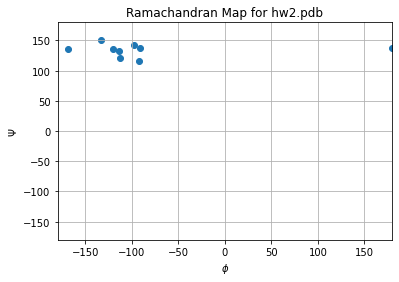

In [71]:
protein_structure = read_pdb_file('hw2.pdb')
phi_list, psi_list, _, _ = calculate_all(protein_structure)

plt.scatter(phi_list, psi_list)
plt.grid()
plt.title('Ramachandran Map for hw2.pdb')
plt.xlabel('$\phi$')
plt.ylabel('$\Psi$')
plt.xlim(-180, 180)
plt.ylim(-180, 180)

Question: According to you Ramachandran map, is the peptide you are given an alpha-helix, beta-sheet, or loop region? Write your answer in the cell below.

According to the Ramachandran Map, this given peptide forms a $\beta$-sheet.